In [1]:
# Text Preprocessing Tutorial with Sample Data
# This notebook demonstrates comprehensive text preprocessing techniques

# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download required NLTK data (run once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Create sample text data (40-50 lines of diverse text)
sample_texts = [
    "Breaking News: Major earthquake hits California! Emergency services responding immediately.",
    "The weather forecast shows sunny skies with temperatures reaching 85°F today ☀️",
    "I'm SO excited about the new movie release this weekend! Can't wait to see it 😍",
    "Traffic alert: Highway 101 is closed due to construction work. Please find alternate routes.",
    "Just finished reading an amazing book about artificial intelligence and machine learning.",
    "The restaurant serves delicious Italian food with authentic flavors and great service.",
    "Stock market update: Tech stocks are rising while energy sectors show mixed results.",
    "My grandmother's homemade cookies are the BEST in the world! Recipe passed down generations.",
    "Climate change is affecting weather patterns globally, scientists report new findings.",
    "The new smartphone features include advanced camera technology and longer battery life.",
    "LOL! That joke was hilarious 😂 Thanks for sharing it with me!",
    "University announces new scholarship programs for international students studying abroad.",
    "The soccer match ended in a dramatic 3-2 victory for the home team.",
    "Online shopping has revolutionized how we purchase goods and services nowadays.",
    "The concert was absolutely FANTASTIC! The band played all their hit songs.",
    "Research shows that regular exercise improves both physical and mental health significantly.",
    "The historical museum displays artifacts from ancient civilizations and cultures.",
    "Social media platforms are changing how people communicate and share information.",
    "The bakery offers fresh bread, pastries, and cakes made daily with organic ingredients.",
    "Technological advancements in renewable energy are helping combat environmental issues.",
    "The thriller novel kept me on the edge of my seat until the very last page!",
    "Public transportation systems need improvements to reduce urban traffic congestion.",
    "The art gallery showcases contemporary paintings, sculptures, and digital artwork.",
    "Cooking classes teach students how to prepare healthy, nutritious meals at home.",
    "The documentary explores wildlife conservation efforts in national parks worldwide.",
    "Remote work has become more common since the pandemic changed workplace dynamics.",
    "The garden blooms with colorful flowers, herbs, and vegetables throughout the seasons.",
    "Educational technology is transforming traditional classroom learning experiences.",
    "The marathon runner completed the 26.2-mile race in under three hours!",
    "Sustainable farming practices help preserve soil quality and protect the environment.",
    "The coffee shop serves specialty drinks made with ethically sourced beans.",
    "Medical research continues to advance treatments for various diseases and conditions.",
    "The theater production received standing ovations from the enthusiastic audience.",
    "Cybersecurity measures are essential for protecting personal data and privacy online.",
    "The hiking trail offers breathtaking views of mountains, forests, and valleys.",
    "Food trucks provide diverse culinary options for busy urban professionals.",
    "The library provides access to books, digital resources, and quiet study spaces.",
    "Artificial intelligence is being integrated into various industries and applications.",
    "The beach vacation included swimming, surfing, and relaxing under the sun.",
    "Community gardens bring neighbors together while promoting sustainable living practices.",
    "The startup company developed innovative solutions for modern business challenges.",
    "Music festivals celebrate diverse genres and bring artists and fans together.",
    "The hospital implemented new protocols to improve patient care and safety.",
    "Urban planning focuses on creating livable, sustainable cities for future generations.",
    "The photography workshop taught techniques for capturing stunning landscape images.",
    "E-commerce platforms have transformed retail shopping into convenient online experiences.",
    "The fitness center offers various classes including yoga, pilates, and strength training.",
    "Scientific discoveries continue to expand our understanding of the universe.",
    "The farmers market features locally grown produce and handmade crafts.",
    "Virtual reality technology creates immersive experiences for entertainment and education."
]

# Create a DataFrame with sample data
df = pd.DataFrame({
    'id': range(1, len(sample_texts) + 1),
    'text': sample_texts,
    'category': ['news', 'weather', 'entertainment', 'traffic', 'technology'] * 10  # Rotating categories
})

print("Sample Data Created:")
print(f"Total samples: {len(df)}")
print("\nFirst 5 samples:")
print(df.head())
print("\nDataFrame Info:")
print(df.info())


Sample Data Created:
Total samples: 50

First 5 samples:
   id                                               text       category
0   1  Breaking News: Major earthquake hits Californi...           news
1   2  The weather forecast shows sunny skies with te...        weather
2   3  I'm SO excited about the new movie release thi...  entertainment
3   4  Traffic alert: Highway 101 is closed due to co...        traffic
4   5  Just finished reading an amazing book about ar...     technology

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50 non-null     int64 
 1   text      50 non-null     object
 2   category  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [2]:
# =============================================================================
# STEP 1: CASE CONVERSION
# =============================================================================
print("\n" + "="*50)
print("STEP 1: CONVERTING TO LOWERCASE")
print("="*50)

# Convert all text to lowercase for consistency
df['text_lower'] = df['text'].str.lower()

print("Before lowercase conversion:")
print(df['text'].iloc[0])
print("\nAfter lowercase conversion:")
print(df['text_lower'].iloc[0])



STEP 1: CONVERTING TO LOWERCASE
Before lowercase conversion:
Breaking News: Major earthquake hits California! Emergency services responding immediately.

After lowercase conversion:
breaking news: major earthquake hits california! emergency services responding immediately.


In [3]:
# =============================================================================
# STEP 2: REMOVING PUNCTUATION
# =============================================================================
print("\n" + "="*50)
print("STEP 2: REMOVING PUNCTUATION")
print("="*50)

# Get all punctuation marks
punctuation = string.punctuation
print(f"Punctuation marks to remove: {punctuation}")

# Create translation table to remove punctuation
translator = str.maketrans("", "", punctuation)

# Apply punctuation removal
df['text_no_punct'] = df['text_lower'].str.translate(translator)

print(f"\nBefore punctuation removal:")
print(df['text_lower'].iloc[0])
print(f"\nAfter punctuation removal:")
print(df['text_no_punct'].iloc[0])




STEP 2: REMOVING PUNCTUATION
Punctuation marks to remove: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

Before punctuation removal:
breaking news: major earthquake hits california! emergency services responding immediately.

After punctuation removal:
breaking news major earthquake hits california emergency services responding immediately


In [4]:
# =============================================================================
# STEP 3: REMOVING STOPWORDS
# =============================================================================
print("\n" + "="*50)
print("STEP 3: REMOVING STOPWORDS")
print("="*50)

from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))
print(f"Number of stopwords: {len(stop_words)}")
print(f"Sample stopwords: {list(stop_words)[:10]}")

# Function to remove stopwords
def remove_stopwords(text):
    """Remove stopwords from text"""
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply stopword removal
df['text_no_stopwords'] = df['text_no_punct'].apply(remove_stopwords)

print(f"\nBefore stopword removal:")
print(df['text_no_punct'].iloc[0])
print(f"\nAfter stopword removal:")
print(df['text_no_stopwords'].iloc[0])




STEP 3: REMOVING STOPWORDS
Number of stopwords: 198
Sample stopwords: ["we'll", "i'll", 'my', 'hasn', 'ain', 'just', 'other', 'she', 'i', 'our']

Before stopword removal:
breaking news major earthquake hits california emergency services responding immediately

After stopword removal:
breaking news major earthquake hits california emergency services responding immediately


In [5]:
# =============================================================================
# STEP 4: IDENTIFYING AND REMOVING FREQUENT WORDS
# =============================================================================
print("\n" + "="*50)
print("STEP 4: IDENTIFYING AND REMOVING FREQUENT WORDS")
print("="*50)

# Count word frequencies across all documents
word_counter = Counter()
for text in df['text_no_stopwords']:
    words = text.split()
    word_counter.update(words)

# Get top 10 most frequent words
top_frequent = word_counter.most_common(10)
print("Top 10 most frequent words:")
for word, count in top_frequent:
    print(f"  {word}: {count}")

# Extract just the words (not frequencies)
frequent_words = [word for word, count in top_frequent]

# Function to remove frequent words
def remove_frequent_words(text, frequent_list):
    """Remove frequent words from text"""
    words = text.split()
    filtered_words = [word for word in words if word not in frequent_list]
    return ' '.join(filtered_words)

# Apply frequent word removal
df['text_no_frequent'] = df['text_no_stopwords'].apply(
    lambda x: remove_frequent_words(x, frequent_words)
)

print(f"\nBefore frequent word removal:")
print(df['text_no_stopwords'].iloc[0])
print(f"\nAfter frequent word removal:")
print(df['text_no_frequent'].iloc[0])




STEP 4: IDENTIFYING AND REMOVING FREQUENT WORDS
Top 10 most frequent words:
  new: 5
  technology: 3
  online: 3
  offers: 3
  urban: 3
  experiences: 3
  sustainable: 3
  various: 3
  services: 2
  weather: 2

Before frequent word removal:
breaking news major earthquake hits california emergency services responding immediately

After frequent word removal:
breaking news major earthquake hits california emergency responding immediately


In [6]:
# =============================================================================
# STEP 5: IDENTIFYING AND REMOVING RARE WORDS
# =============================================================================
print("\n" + "="*50)
print("STEP 5: IDENTIFYING AND REMOVING RARE WORDS")
print("="*50)

# Get 10 rarest words (words that appear only once)
rare_words = [word for word, count in word_counter.most_common()[-10:]]
print("10 rarest words:")
for word in rare_words:
    print(f"  {word}: {word_counter[word]}")

# Function to remove rare words
def remove_rare_words(text, rare_list):
    """Remove rare words from text"""
    words = text.split()
    filtered_words = [word for word in words if word not in rare_list]
    return ' '.join(filtered_words)

# Apply rare word removal
df['text_no_rare'] = df['text_no_frequent'].apply(
    lambda x: remove_rare_words(x, rare_words)
)

print(f"\nBefore rare word removal:")
print(df['text_no_frequent'].iloc[0])
print(f"\nAfter rare word removal:")
print(df['text_no_rare'].iloc[0])




STEP 5: IDENTIFYING AND REMOVING RARE WORDS
10 rarest words:
  grown: 1
  produce: 1
  handmade: 1
  crafts: 1
  virtual: 1
  reality: 1
  creates: 1
  immersive: 1
  entertainment: 1
  education: 1

Before rare word removal:
breaking news major earthquake hits california emergency responding immediately

After rare word removal:
breaking news major earthquake hits california emergency responding immediately


In [7]:
# =============================================================================
# STEP 6: STEMMING
# =============================================================================
print("\n" + "="*50)
print("STEP 6: STEMMING")
print("="*50)

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Initialize stemmers
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')

# Function for Porter stemming
def porter_stem_text(text):
    """Apply Porter stemming to text"""
    words = text.split()
    stemmed_words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Function for Snowball stemming
def snowball_stem_text(text):
    """Apply Snowball stemming to text"""
    words = text.split()
    stemmed_words = [snowball_stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply both stemming techniques
df['text_porter_stem'] = df['text_no_rare'].apply(porter_stem_text)
df['text_snowball_stem'] = df['text_no_rare'].apply(snowball_stem_text)

print("Original text:")
print(df['text_no_rare'].iloc[0])
print("\nAfter Porter stemming:")
print(df['text_porter_stem'].iloc[0])
print("\nAfter Snowball stemming:")
print(df['text_snowball_stem'].iloc[0])




STEP 6: STEMMING
Original text:
breaking news major earthquake hits california emergency responding immediately

After Porter stemming:
break news major earthquak hit california emerg respond immedi

After Snowball stemming:
break news major earthquak hit california emerg respond immedi


In [8]:
# =============================================================================
# STEP 7: LEMMATIZATION
# =============================================================================
print("\n" + "="*50)
print("STEP 7: LEMMATIZATION")
print("="*50)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for basic lemmatization
def lemmatize_text(text):
    """Apply basic lemmatization to text"""
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Function to get wordnet POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function for POS-aware lemmatization
def lemmatize_with_pos(text):
    """Apply POS-aware lemmatization to text"""
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

# Apply both lemmatization techniques
df['text_lemmatized'] = df['text_no_rare'].apply(lemmatize_text)
df['text_lemmatized_pos'] = df['text_no_rare'].apply(lemmatize_with_pos)

print("Original text:")
print(df['text_no_rare'].iloc[0])
print("\nAfter basic lemmatization:")
print(df['text_lemmatized'].iloc[0])
print("\nAfter POS-aware lemmatization:")
print(df['text_lemmatized_pos'].iloc[0])




STEP 7: LEMMATIZATION
Original text:
breaking news major earthquake hits california emergency responding immediately

After basic lemmatization:
breaking news major earthquake hit california emergency responding immediately

After POS-aware lemmatization:
break news major earthquake hit california emergency respond immediately


In [9]:
# =============================================================================
# STEP 8: REMOVING EMOJIS AND EMOTICONS
# =============================================================================
print("\n" + "="*50)
print("STEP 8: REMOVING EMOJIS AND EMOTICONS")
print("="*50)

# Function to remove emojis
def remove_emojis(text):
    """Remove emojis from text"""
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002500-\U00002BEF"  # chinese char
                              u"\U00002702-\U000027B0"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              u"\U0001f926-\U0001f937"
                              u"\U00010000-\U0010ffff"
                              u"\u2640-\u2642"
                              u"\u2600-\u2B55"
                              u"\u200d"
                              u"\u23cf"
                              u"\u23e9"
                              u"\u231a"
                              u"\ufe0f"
                              u"\u3030"
                              "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Common emoticons dictionary
emoticons = {
    ':)': 'happy',
    ':-)': 'happy',
    ':D': 'very happy',
    ':(': 'sad',
    ':-(': 'sad',
    ';)': 'winking',
    ':P': 'tongue out',
    ':o': 'surprised',
    ':O': 'surprised',
    ':/': 'confused',
    ':|': 'neutral'
}

# Function to remove emoticons
def remove_emoticons(text):
    """Remove emoticons from text"""
    for emoticon in emoticons.keys():
        text = text.replace(emoticon, '')
    return text

# Apply emoji and emoticon removal to our sample texts
df['text_no_emojis'] = df['text_lemmatized_pos'].apply(remove_emojis)
df['text_clean'] = df['text_no_emojis'].apply(remove_emoticons)

print("Text after emoji/emoticon removal:")
print(df['text_clean'].iloc[1])  # Weather text had emoji




STEP 8: REMOVING EMOJIS AND EMOTICONS
Text after emoji/emoticon removal:
forecast show sunny sky temperature reach 85°f today 


In [10]:
# =============================================================================
# STEP 9: REMOVING URLS AND HTML TAGS
# =============================================================================
print("\n" + "="*50)
print("STEP 9: REMOVING URLS AND HTML TAGS")
print("="*50)

# Function to remove URLs
def remove_urls(text):
    """Remove URLs from text"""
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Function to remove HTML tags
def remove_html_tags(text):
    """Remove HTML tags from text"""
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Apply URL and HTML removal
df['text_clean'] = df['text_clean'].apply(remove_urls)
df['text_clean'] = df['text_clean'].apply(remove_html_tags)

print("Text after URL and HTML removal:")
print(df['text_clean'].iloc[0])




STEP 9: REMOVING URLS AND HTML TAGS
Text after URL and HTML removal:
break news major earthquake hit california emergency respond immediately


In [11]:
# =============================================================================
# STEP 10: FINAL PREPROCESSING SUMMARY
# =============================================================================
print("\n" + "="*50)
print("PREPROCESSING SUMMARY")
print("="*50)

# Show transformation steps for first sample
print("TRANSFORMATION STEPS FOR SAMPLE 1:")
print(f"Original: {df['text'].iloc[0]}")
print(f"Lowercase: {df['text_lower'].iloc[0]}")
print(f"No punctuation: {df['text_no_punct'].iloc[0]}")
print(f"No stopwords: {df['text_no_stopwords'].iloc[0]}")
print(f"No frequent words: {df['text_no_frequent'].iloc[0]}")
print(f"No rare words: {df['text_no_rare'].iloc[0]}")
print(f"Lemmatized: {df['text_lemmatized_pos'].iloc[0]}")
print(f"Final clean: {df['text_clean'].iloc[0]}")

# Create summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"Total documents processed: {len(df)}")
print(f"Average words per document (original): {df['text'].str.split().str.len().mean():.2f}")
print(f"Average words per document (cleaned): {df['text_clean'].str.split().str.len().mean():.2f}")




PREPROCESSING SUMMARY
TRANSFORMATION STEPS FOR SAMPLE 1:
Original: Breaking News: Major earthquake hits California! Emergency services responding immediately.
Lowercase: breaking news: major earthquake hits california! emergency services responding immediately.
No punctuation: breaking news major earthquake hits california emergency services responding immediately
No stopwords: breaking news major earthquake hits california emergency services responding immediately
No frequent words: breaking news major earthquake hits california emergency responding immediately
No rare words: breaking news major earthquake hits california emergency responding immediately
Lemmatized: break news major earthquake hit california emergency respond immediately
Final clean: break news major earthquake hit california emergency respond immediately

SUMMARY STATISTICS:
Total documents processed: 50
Average words per document (original): 11.28
Average words per document (cleaned): 7.54



WORD CLOUD VISUALIZATION


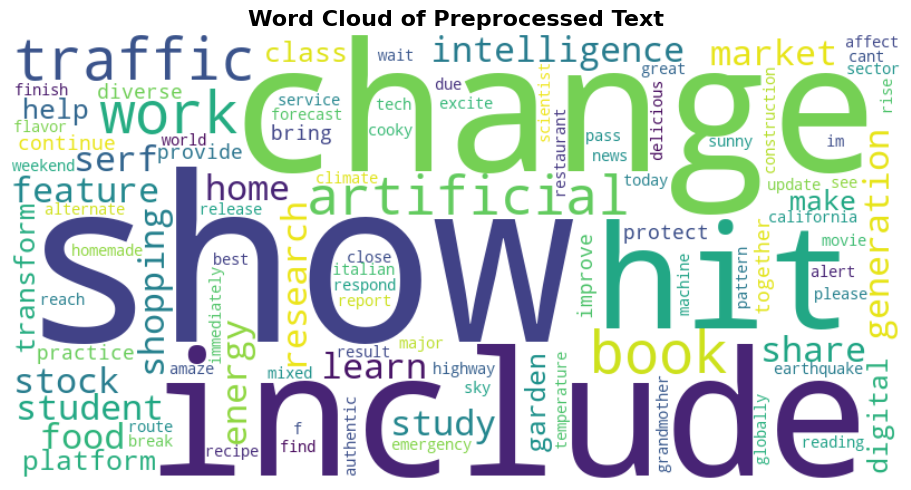

In [12]:
# =============================================================================
# STEP 11: WORD CLOUD VISUALIZATION
# =============================================================================
print("\n" + "="*50)
print("WORD CLOUD VISUALIZATION")
print("="*50)

# Combine all cleaned text
all_text = ' '.join(df['text_clean'].values)

# Create word cloud
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     max_words=100,
                     colormap='viridis').generate(all_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Text', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [13]:
# =============================================================================
# STEP 12: SAVING RESULTS
# =============================================================================
print("\n" + "="*50)
print("SAVING RESULTS")
print("="*50)

# Select important columns for final dataset
final_columns = ['id', 'text', 'text_clean', 'category']
df_final = df[final_columns].copy()

# Save to CSV
df_final.to_csv('preprocessed_text_data.csv', index=False)
print("Results saved to 'preprocessed_text_data.csv'")

# Display final dataset
print("\nFinal preprocessed dataset:")
print(df_final.head())

print("\n" + "="*50)
print("TEXT PREPROCESSING COMPLETE!")
print("="*50)


SAVING RESULTS
Results saved to 'preprocessed_text_data.csv'

Final preprocessed dataset:
   id                                               text  \
0   1  Breaking News: Major earthquake hits Californi...   
1   2  The weather forecast shows sunny skies with te...   
2   3  I'm SO excited about the new movie release thi...   
3   4  Traffic alert: Highway 101 is closed due to co...   
4   5  Just finished reading an amazing book about ar...   

                                          text_clean       category  
0  break news major earthquake hit california eme...           news  
1  forecast show sunny sky temperature reach 85°f...        weather  
2     im excite movie release weekend cant wait see   entertainment  
3  traffic alert highway 101 close due constructi...        traffic  
4  finish reading amaze book artificial intellige...     technology  

TEXT PREPROCESSING COMPLETE!
